In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/JacobRickman/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
calibrations_df = pd.read_csv('Calibration.csv', header=None)
pressure_df = pd.read_csv('Pressure.csv', header=None)
time_df = pd.read_csv('Time.csv', header=None)
time_stamps_df = pd.read_csv('Time_Stamps.csv', header=None)

In [3]:
calibration_means = calibrations_df.mean()

In [4]:
for x in calibrations_df.columns:
    pressure_df[x] = calibration_means[x] - pressure_df[x]
pressure_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.455736,-0.672547,-0.144585,-0.999453,-0.312472,-0.645792,-1.031189,-1.034509,-0.58766,-0.781151,...,-0.740717,-0.620208,-0.81366,-0.99217,-0.505868,-0.291623,-0.487189,-0.576906,-0.642981,-0.087283
1,-0.455736,-0.505547,-0.144585,-0.826453,0.037328,-0.816792,-1.031189,-0.864509,-0.76666,-0.421151,...,-1.104717,-0.966208,-0.64466,-0.66917,-0.845868,-0.458623,-0.145189,-0.576906,-0.476981,-0.395283
2,-0.617736,-0.672547,-0.487585,-1.171453,-0.487472,-0.987792,-1.218189,-1.034509,-0.76666,-0.961151,...,-1.104717,-0.966208,-0.81366,-0.83117,-0.675868,-0.626623,-0.487189,-0.743906,-0.809981,-0.395283
3,-0.455736,-0.172547,-0.144585,-0.826453,-0.137572,-0.816792,-1.218189,-1.034509,-0.76666,-0.601151,...,-1.285717,-0.793208,-0.64466,-0.66917,-0.505868,-0.458623,-0.487189,-0.743906,-0.642981,0.220717
4,-0.129736,-0.172547,-0.144585,-0.826453,0.387128,-0.474792,-0.471189,-0.694509,-0.40866,-0.601151,...,-0.740717,-0.274208,-0.47466,-0.83117,-0.675868,-0.458623,-0.316189,-0.408906,-0.642981,-0.087283


In [5]:
pressure_df.columns = ['port_' + str(x + 1) for x in pressure_df.columns]
pressure_df['time'] = time_df.values
pressure_df.head()

,port_1,port_2,port_3,port_4,port_5,port_6,port_7,port_8,port_9,port_10,...,port_25,port_26,port_27,port_28,port_29,port_30,port_31,port_32,port_33,time
0,-0.455736,-0.672547,-0.144585,-0.999453,-0.312472,-0.645792,-1.031189,-1.034509,-0.58766,-0.781151,...,-0.620208,-0.81366,-0.99217,-0.505868,-0.291623,-0.487189,-0.576906,-0.642981,-0.087283,644.69
1,-0.455736,-0.505547,-0.144585,-0.826453,0.037328,-0.816792,-1.031189,-0.864509,-0.76666,-0.421151,...,-0.966208,-0.64466,-0.66917,-0.845868,-0.458623,-0.145189,-0.576906,-0.476981,-0.395283,645.01
2,-0.617736,-0.672547,-0.487585,-1.171453,-0.487472,-0.987792,-1.218189,-1.034509,-0.76666,-0.961151,...,-0.966208,-0.81366,-0.83117,-0.675868,-0.626623,-0.487189,-0.743906,-0.809981,-0.395283,645.33
3,-0.455736,-0.172547,-0.144585,-0.826453,-0.137572,-0.816792,-1.218189,-1.034509,-0.76666,-0.601151,...,-0.793208,-0.64466,-0.66917,-0.505868,-0.458623,-0.487189,-0.743906,-0.642981,0.220717,645.65
4,-0.129736,-0.172547,-0.144585,-0.826453,0.387128,-0.474792,-0.471189,-0.694509,-0.40866,-0.601151,...,-0.274208,-0.47466,-0.83117,-0.675868,-0.458623,-0.316189,-0.408906,-0.642981,-0.087283,645.97


In [6]:
front_end_readings = pressure_df[[0,1,2,3,4]]
front_end_readings.head()

,port_1,port_2,port_3,port_4,port_5
0,-0.455736,-0.672547,-0.144585,-0.999453,-0.312472
1,-0.455736,-0.505547,-0.144585,-0.826453,0.037328
2,-0.617736,-0.672547,-0.487585,-1.171453,-0.487472
3,-0.455736,-0.172547,-0.144585,-0.826453,-0.137572
4,-0.129736,-0.172547,-0.144585,-0.826453,0.387128


In [7]:
#remove the front 5 ports - reading the car airspeed
#removed 30, 33 as they were broken or something
pressure_df = pressure_df.drop(['port_1','port_2','port_3','port_4','port_5', 'port_30', 'port_33'], axis = 1)
pressure_df.head()

,port_6,port_7,port_8,port_9,port_10,port_11,port_12,port_13,port_14,port_15,...,port_23,port_24,port_25,port_26,port_27,port_28,port_29,port_31,port_32,time
0,-0.645792,-1.031189,-1.034509,-0.58766,-0.781151,-0.727245,-0.659679,-0.444951,-0.441604,-0.759358,...,-0.752528,-0.740717,-0.620208,-0.81366,-0.99217,-0.505868,-0.291623,-0.576906,-0.642981,644.69
1,-0.816792,-1.031189,-0.864509,-0.76666,-0.421151,-1.070245,-0.659679,-0.444951,-0.620604,-0.942358,...,-0.752528,-1.104717,-0.966208,-0.64466,-0.66917,-0.845868,-0.458623,-0.576906,-0.476981,645.01
2,-0.987792,-1.218189,-1.034509,-0.76666,-0.961151,-1.242245,-1.380679,-0.789251,-0.620604,-1.126358,...,-0.931528,-1.104717,-0.966208,-0.81366,-0.83117,-0.675868,-0.626623,-0.743906,-0.809981,645.33
3,-0.816792,-1.218189,-1.034509,-0.76666,-0.601151,-1.070245,-0.839679,-0.961451,-0.800604,-0.392358,...,-0.752528,-1.285717,-0.793208,-0.64466,-0.66917,-0.505868,-0.458623,-0.743906,-0.642981,645.65
4,-0.474792,-0.471189,-0.694509,-0.40866,-0.601151,-0.385245,-0.479679,-0.617051,-0.262604,-0.575358,...,-0.572528,-0.740717,-0.274208,-0.47466,-0.83117,-0.675868,-0.458623,-0.408906,-0.642981,645.97


In [8]:
time_stamps_df.columns = ['event_' + str(x+1) for x in time_stamps_df.columns]

In [9]:
time_stamps_df = pd.concat([time_stamps_df, time_stamps_df['event_1'].iloc[1:].reset_index(drop=True).rename(
                            'event_10_stop')],
                             axis=1)

In [10]:
pressure_df.head()

,port_6,port_7,port_8,port_9,port_10,port_11,port_12,port_13,port_14,port_15,...,port_23,port_24,port_25,port_26,port_27,port_28,port_29,port_31,port_32,time
0,-0.645792,-1.031189,-1.034509,-0.58766,-0.781151,-0.727245,-0.659679,-0.444951,-0.441604,-0.759358,...,-0.752528,-0.740717,-0.620208,-0.81366,-0.99217,-0.505868,-0.291623,-0.576906,-0.642981,644.69
1,-0.816792,-1.031189,-0.864509,-0.76666,-0.421151,-1.070245,-0.659679,-0.444951,-0.620604,-0.942358,...,-0.752528,-1.104717,-0.966208,-0.64466,-0.66917,-0.845868,-0.458623,-0.576906,-0.476981,645.01
2,-0.987792,-1.218189,-1.034509,-0.76666,-0.961151,-1.242245,-1.380679,-0.789251,-0.620604,-1.126358,...,-0.931528,-1.104717,-0.966208,-0.81366,-0.83117,-0.675868,-0.626623,-0.743906,-0.809981,645.33
3,-0.816792,-1.218189,-1.034509,-0.76666,-0.601151,-1.070245,-0.839679,-0.961451,-0.800604,-0.392358,...,-0.752528,-1.285717,-0.793208,-0.64466,-0.66917,-0.505868,-0.458623,-0.743906,-0.642981,645.65
4,-0.474792,-0.471189,-0.694509,-0.40866,-0.601151,-0.385245,-0.479679,-0.617051,-0.262604,-0.575358,...,-0.572528,-0.740717,-0.274208,-0.47466,-0.83117,-0.675868,-0.458623,-0.408906,-0.642981,645.97


In [11]:
time_stamps_df

,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,event_10,event_10_stop
0,745.69,757.69,763.69,775.69,805.69,810.19,815.19,827.69,839.69,848.69,866.69
1,866.69,880.69,885.69,898.69,1041.70,1046.20,1051.20,1063.70,1073.70,1082.70,1101.70
2,1101.70,1114.70,1119.70,1132.70,1160.70,1164.20,1169.20,1182.70,1192.70,1201.70,1220.70
3,1220.70,1232.70,1237.70,1250.70,1279.70,1283.20,1288.20,1301.70,1310.70,1319.70,1339.70
4,1339.70,1351.70,1356.70,1369.70,1397.70,1401.20,1406.20,1419.70,1429.70,1438.70,1458.70
5,1458.70,1469.70,1475.70,1488.70,1516.70,1520.20,1525.20,1537.70,1548.70,1557.70,1576.70
6,1576.70,1588.70,1593.70,1606.70,1635.70,1639.20,1644.20,1656.70,1667.70,1676.70,1812.70
7,1812.70,1824.70,1830.70,1843.70,1871.70,1875.20,1880.20,1893.70,1903.70,1912.70,1931.70
8,1931.70,1943.70,1948.70,1961.70,1990.70,1994.20,1999.20,2011.70,2022.70,2031.70,2050.70
9,2050.70,2061.70,2067.70,2080.70,2109.70,2113.20,2118.20,2130.70,2141.70,2149.70,2168.70


In [12]:
pressure_df['key'] = 1
time_stamps_df['key'] = 1

In [13]:
time_stamps_df['lap_#'] = ['lap_' + str(x + 1) for x in time_stamps_df.index]
pressure_df = pressure_df.merge(time_stamps_df, on = 'key')

In [14]:
pressure_df = pressure_df[(pressure_df.time < pressure_df['event_10_stop']) & 
                          (pressure_df.time >= pressure_df['event_1'])]

In [15]:
def label_event(row):
    
    if row['time'] >= row['event_1'] and row['time'] < row['event_2']:
        return 'event_1'
    elif row['time'] >= row['event_2'] and row['time'] < row['event_3']:
        return 'event_2'
    elif row['time'] >= row['event_3'] and row['time'] < row['event_4']:
        return 'event_3'
    elif row['time'] >= row['event_4'] and row['time'] < row['event_5']:
        return 'event_4'
    elif row['time'] >= row['event_5'] and row['time'] < row['event_6']:
        return 'event_5'
    elif row['time'] >= row['event_6'] and row['time'] < row['event_7']:
        return 'event_6'
    elif row['time'] >= row['event_7'] and row['time'] < row['event_8']:
        return 'event_7'
    elif row['time'] >= row['event_8'] and row['time'] < row['event_9']:
        return 'event_8'
    elif row['time'] >= row['event_9'] and row['time'] < row['event_10']:
        return 'event_9'
    elif row['time'] >= row['event_10'] and row['time'] < row['event_10_stop']:
        return 'event_10'
    else:
        assert False


In [16]:
pressure_df['event_label'] = pressure_df.apply(label_event, axis = 1)

In [17]:
columns = [x for x in pressure_df.columns if ('label' in x or
                                                'port' in x or
                                                'time' in x or
                                                'lap' in x)]


['port_6',
 'port_7',
 'port_8',
 'port_9',
 'port_10',
 'port_11',
 'port_12',
 'port_13',
 'port_14',
 'port_15',
 'port_16',
 'port_17',
 'port_18',
 'port_19',
 'port_20',
 'port_21',
 'port_22',
 'port_23',
 'port_24',
 'port_25',
 'port_26',
 'port_27',
 'port_28',
 'port_29',
 'port_31',
 'port_32',
 'time',
 'lap_#',
 'event_label']

In [18]:
pressure_df = pressure_df[columns].reset_index(drop= True)



,port_6,port_7,port_8,port_9,port_10,port_11,port_12,port_13,port_14,port_15,...,port_25,port_26,port_27,port_28,port_29,port_31,port_32,time,lap_#,event_label
0,-26.464792,-27.324189,-27.560509,-25.09996,-21.295051,-23.501245,-24.445379,-23.645151,-24.094604,-24.435158,...,-23.271008,-22.97566,-22.50127,-21.892168,-21.188323,-20.723806,-20.644381,745.81,lap_1,event_1
1,-26.122792,-27.324189,-27.391509,-24.56376,-22.193451,-24.356245,-24.625179,-24.332151,-24.810504,-24.984658,...,-23.616308,-21.79216,-21.53207,-22.230968,-22.356823,-21.562506,-21.642781,746.13,lap_1,event_1
2,-24.415092,-26.206289,-27.051509,-24.92126,-21.295051,-23.672245,-23.905979,-23.130151,-23.378804,-23.153058,...,-20.335408,-19.42556,-19.59357,-20.367668,-20.353623,-20.388306,-20.477981,746.45,lap_1,event_1
3,-25.098192,-26.578889,-26.542509,-25.63626,-22.193451,-24.698245,-24.984679,-24.503151,-24.810504,-25.350958,...,-21.544108,-20.77796,-20.23967,-20.198268,-20.520623,-19.717306,-19.645981,746.77,lap_1,event_1
4,-24.415092,-25.461089,-25.693509,-23.31256,-20.576351,-22.988245,-23.007079,-22.615151,-22.662904,-23.153058,...,-20.508008,-19.93266,-19.91657,-19.859568,-19.519023,-19.717306,-19.645981,747.09,lap_1,event_1
5,-21.341292,-22.293989,-22.807109,-21.52514,-18.599951,-21.107245,-20.669369,-20.727151,-21.052304,-20.771118,...,-19.817308,-19.08746,-18.78577,-19.012568,-18.851323,-18.039906,-18.148281,747.41,lap_1,event_1
6,-22.536692,-23.039189,-23.486509,-22.06137,-19.138951,-20.936245,-22.287979,-21.585151,-21.768104,-22.054138,...,-19.817308,-19.42556,-18.94737,-18.843168,-18.851323,-18.375406,-18.481081,747.73,lap_1,event_1
7,-26.464792,-27.137889,-27.730509,-25.99366,-22.013751,-24.869245,-25.344279,-25.190151,-25.168604,-25.534058,...,-23.443708,-22.97566,-22.66317,-23.247368,-23.191423,-21.898006,-22.474881,748.05,lap_1,event_1
8,-27.147792,-28.069189,-27.900509,-25.99366,-22.373151,-24.869245,-25.524079,-24.332151,-24.631504,-25.350958,...,-22.925608,-22.80666,-22.01667,-22.400368,-21.856023,-21.394706,-21.309981,748.37,lap_1,event_1
9,-24.756692,-25.833689,-26.542509,-24.92126,-21.834151,-24.014245,-24.265579,-23.130151,-23.915704,-24.252058,...,-22.062208,-20.43986,-20.72437,-21.045268,-21.355223,-20.556006,-20.145181,748.69,lap_1,event_1


In [20]:
group = pressure_df.groupby(['lap_#', 'event_label'])
data = group.mean().reset_index()
data.head()

,lap_#,event_label,port_6,port_7,port_8,port_9,port_10,port_11,port_12,port_13,...,port_23,port_24,port_25,port_26,port_27,port_28,port_29,port_31,port_32,time
0,lap_1,event_1,-27.053158,-27.686918,-27.864815,-26.003107,-22.869564,-25.535719,-26.011368,-25.158677,...,-25.570684,-25.997743,-23.598189,-22.455076,-21.923151,-22.083902,-22.106452,-21.143119,-21.143605,751.730000
1,lap_1,event_10,-22.423819,-23.187098,-23.461940,-21.795703,-19.097288,-21.000304,-21.255409,-20.873626,...,-21.072608,-21.500637,-19.480015,-18.690253,-18.351534,-18.467063,-18.448900,-17.940004,-18.136373,857.649821
2,lap_1,event_2,-23.798504,-24.125944,-24.344532,-22.497973,-19.837729,-22.180734,-22.667091,-21.909484,...,-22.084462,-22.384067,-20.249008,-19.538244,-19.037092,-19.040829,-18.962595,-18.095833,-18.074302,760.690000
3,lap_1,event_3,-19.583509,-19.949368,-20.112880,-18.967555,-16.839464,-18.532966,-18.864608,-18.408783,...,-18.935478,-19.296378,-17.757343,-16.969592,-16.693917,-16.817281,-16.755464,-16.397028,-16.482105,769.650000
4,lap_1,event_4,-14.465794,-14.630672,-14.843454,-13.695177,-12.000581,-13.372662,-13.376208,-13.158647,...,-12.409842,-12.593690,-10.594413,-10.111644,-9.718901,-9.648127,-9.502383,-8.813954,-8.765761,790.770000


In [23]:
data = data.drop('time', axis = 1)


ValueError: labels ['time'] not contained in axis

In [26]:
pressure_df.to_csv("Data_Table.csv", index = False)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [58]:
X = data[[x for x in data if 'port' in x]]
Y = data.event_label

In [59]:
cfl = LogisticRegression()
scores = cross_val_score(cfl, X, Y, cv = 5)
scores

array([ 0.6       ,  0.76666667,  0.75      ,  0.45      ,  0.75      ])

In [60]:
cfl = SVC()
scores = cross_val_score(cfl, X, Y, cv = 10)
scores

array([ 0.35,  0.55,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.5 ,  0.4 ,  0.4 ,  0.5 ])

In [61]:
cfl = GaussianNB()
scores = cross_val_score(cfl, X, Y, cv = 10)
scores

array([ 0.25,  0.4 ,  0.5 ,  0.5 ,  0.7 ,  0.6 ,  0.3 ,  0.2 ,  0.6 ,  0.4 ])

In [62]:
cfl = RandomForestClassifier()
scores = cross_val_score(cfl, X, Y, cv = 10)
scores

array([ 0.35,  0.45,  0.6 ,  0.5 ,  0.7 ,  0.6 ,  0.4 ,  0.3 ,  0.6 ,  0.6 ])

In [71]:
event = 'event_4'
port = 'port_10'

##parse out all data points of event and for port

lap_1 = pressure_df.loc[pressure_df['event_label'] == event]
lap_1 = lap_1.loc[pressure_df['lap_#'] == 'lap_1']
lap_1 = lap_1[port]
lap_1 = lap_1.reset_index(drop= True)

lap_2 = pressure_df.loc[pressure_df['event_label'] == event]
lap_2 = lap_2.loc[pressure_df['lap_#'] == 'lap_2']
lap_2 = lap_2[port]
lap_2 = lap_2.reset_index(drop= True)

lap_3 = pressure_df.loc[pressure_df['event_label'] == event]
lap_3 = lap_3.loc[pressure_df['lap_#'] == 'lap_3']
lap_3 = lap_3[port]
lap_3 = lap_3.reset_index(drop= True)

lap_4 = pressure_df.loc[pressure_df['event_label'] == event]
lap_4 = lap_4.loc[pressure_df['lap_#'] == 'lap_4']
lap_4 = lap_4[port]
lap_4 = lap_4.reset_index(drop= True)

lap_5 = pressure_df.loc[pressure_df['event_label'] == event]
lap_5 = lap_5.loc[pressure_df['lap_#'] == 'lap_5']
lap_5 = lap_5[port]
lap_5 = lap_5.reset_index(drop= True)

lap_6 = pressure_df.loc[pressure_df['event_label'] == event]
lap_6 = lap_6.loc[pressure_df['lap_#'] == 'lap_6']
lap_6 = lap_6[port]
lap_6 = lap_6.reset_index(drop= True)

lap_7 = pressure_df.loc[pressure_df['event_label'] == event]
lap_7 = lap_7.loc[pressure_df['lap_#'] == 'lap_7']
lap_7 = lap_7[port]
lap_7 = lap_7.reset_index(drop= True)

lap_8 = pressure_df.loc[pressure_df['event_label'] == event]
lap_8 = lap_8.loc[pressure_df['lap_#'] == 'lap_8']
lap_8 = lap_8[port]
lap_8 = lap_8.reset_index(drop= True)

lap_9 = pressure_df.loc[pressure_df['event_label'] == event]
lap_9 = lap_9.loc[pressure_df['lap_#'] == 'lap_9']
lap_9 = lap_9[port]
lap_9 = lap_9.reset_index(drop= True)

lap_10 = pressure_df.loc[pressure_df['event_label'] == event]
lap_10 = lap_10.loc[pressure_df['lap_#'] == 'lap_10']
lap_10 = lap_10[port]
lap_10 = lap_10.reset_index(drop= True)

lap_11 = pressure_df.loc[pressure_df['event_label'] == event]
lap_11 = lap_11.loc[pressure_df['lap_#'] == 'lap_11']
lap_11 = lap_11[port]
lap_11 = lap_11.reset_index(drop= True)

lap_12 = pressure_df.loc[pressure_df['event_label'] == event]
lap_12 = lap_12.loc[pressure_df['lap_#'] == 'lap_12']
lap_12 = lap_12[port]
lap_12 = lap_12.reset_index(drop= True)

In [72]:
#used to see when the first NaN start so i can reshape the series correctly
plot = pd.concat([lap_1, lap_2, lap_3, lap_4,
                         lap_5, lap_6, lap_7, lap_8, lap_9,
                        lap_10, lap_11, lap_12], axis = 1)
plot


,port_10,port_10,port_10,port_10,port_10,port_10,port_10,port_10,port_10,port_10,port_10,port_10
0,-12.485451,-13.386551,-13.746991,-12.306851,-14.106891,-12.846851,-13.386951,-15.544971,-14.467101,-13.386951,-14.287051,-12.486751
1,-11.404551,-11.945951,-12.846851,-11.946751,-13.926791,-12.486851,-13.386951,-15.185841,-13.206851,-15.006271,-13.566951,-11.586551
2,-12.125151,-12.125951,-12.486851,-11.586751,-13.566651,-11.766751,-13.026951,-15.185841,-12.666851,-15.365401,-12.126651,-11.046451
3,-12.305251,-11.765851,-12.846851,-11.586751,-11.765751,-11.406651,-13.026951,-14.107051,-13.026851,-13.926991,-12.486751,-11.586551
4,-11.404551,-11.225551,-13.927051,-11.766751,-12.125951,-11.946751,-12.846851,-12.846851,-12.486751,-14.287101,-12.306651,-11.406551
5,-11.944951,-11.045451,-14.647151,-11.406751,-13.386551,-11.586751,-12.846851,-13.386951,-12.846851,-13.746991,-11.406551,-11.766551
6,-10.503851,-10.865351,-14.647151,-11.046651,-12.306051,-12.306851,-12.846851,-13.026851,-12.126751,-14.287101,-11.406551,-11.946651
7,-10.143551,-9.784851,-14.647151,-11.046651,-11.585751,-12.126751,-12.486851,-12.846851,-12.306751,-13.566951,-13.206851,-11.946651
8,-9.963451,-9.784851,-14.647151,-10.146551,-11.045451,-12.486851,-12.486851,-12.126751,-11.226551,-13.026851,-13.386851,-12.306651
9,-11.224451,-9.424751,-13.566951,-10.326551,-12.666251,-13.206951,-12.666851,-11.946751,-11.406651,-12.666751,-12.306651,-11.946651


In [65]:
#average over the series to get rid of some of the noise, n is how many per average, most is when the NaN begin
#or a little before to better split the data
n = 5
most = 25
lap_1_mean = np.mean(lap_1[:most].reshape(-1, n), axis = 1)
lap_2_mean = np.mean(lap_2[:most].reshape(-1, n), axis = 1)
lap_3_mean = np.mean(lap_3[:most].reshape(-1, n), axis = 1)
lap_4_mean = np.mean(lap_4[:most].reshape(-1, n), axis = 1)
lap_5_mean = np.mean(lap_5[:most].reshape(-1, n), axis = 1)
lap_6_mean = np.mean(lap_6[:most].reshape(-1, n), axis = 1)
#lap_7_mean = np.mean(lap_7[:most].reshape(-1, n), axis = 1)
lap_8_mean = np.mean(lap_8[:most].reshape(-1, n), axis = 1)
lap_9_mean = np.mean(lap_9[:most].reshape(-1, n), axis = 1)
lap_10_mean = np.mean(lap_10[:most].reshape(-1, n), axis = 1)
lap_11_mean = np.mean(lap_11[:most].reshape(-1, n), axis = 1)
lap_12_mean = np.mean(lap_12[:most].reshape(-1, n), axis = 1)
lap_1_mean

array([-25.30319245, -24.44945245, -26.94279245, -26.66939245, -26.56693245])

In [66]:
#get a trend line for the series using pd.ols, not sure if its the best one to use or not
#but least squares seemed ok to start with at least
m = most / n
x = pd.Series(np.arange(m))
regression_lap1 = pd.ols(x = x, y = lap_1_mean)
regression_lap2 = pd.ols(x = x, y = lap_2_mean)
regression_lap3 = pd.ols(x = x, y = lap_3_mean)
regression_lap4 = pd.ols(x = x, y = lap_4_mean)
regression_lap5 = pd.ols(x = x, y = lap_5_mean)
regression_lap6 = pd.ols(x = x, y = lap_6_mean)
#regression_lap7 = pd.ols(x = x, y = lap_7_mean)
regression_lap8 = pd.ols(x = x, y = lap_8_mean)
regression_lap9 = pd.ols(x = x, y = lap_9_mean)
regression_lap10 = pd.ols(x = x, y = lap_10_mean)
regression_lap11 = pd.ols(x = x, y = lap_11_mean)
regression_lap12 = pd.ols(x = x, y = lap_12_mean)

In [67]:
#get the actual trend line, the above is just a structure from statsmodels
trend1 = regression_lap1.predict(beta=regression_lap1.beta, x=x[:m])
trend2 = regression_lap2.predict(beta=regression_lap2.beta, x=x[:m])
trend3 = regression_lap3.predict(beta=regression_lap3.beta, x=x[:m])
trend4 = regression_lap4.predict(beta=regression_lap4.beta, x=x[:m])
trend5 = regression_lap5.predict(beta=regression_lap5.beta, x=x[:m])
trend6 = regression_lap6.predict(beta=regression_lap6.beta, x=x[:m])
#trend7 = regression_lap7.predict(beta=regression_lap7.beta, x=x[:m])
trend8 = regression_lap8.predict(beta=regression_lap8.beta, x=x[:m])
trend9 = regression_lap9.predict(beta=regression_lap9.beta, x=x[:m])
trend10 = regression_lap10.predict(beta=regression_lap10.beta, x=x[:m])
trend11 = regression_lap11.predict(beta=regression_lap11.beta, x=x[:m])
trend12 = regression_lap12.predict(beta=regression_lap12.beta, x=x[:m])

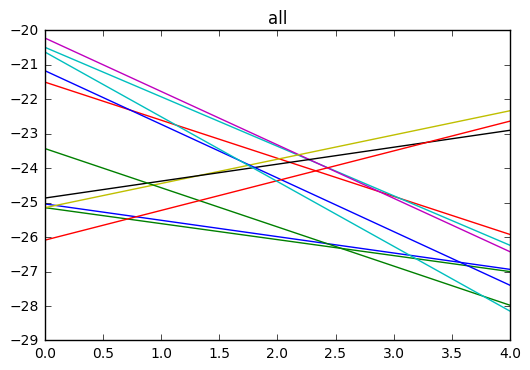

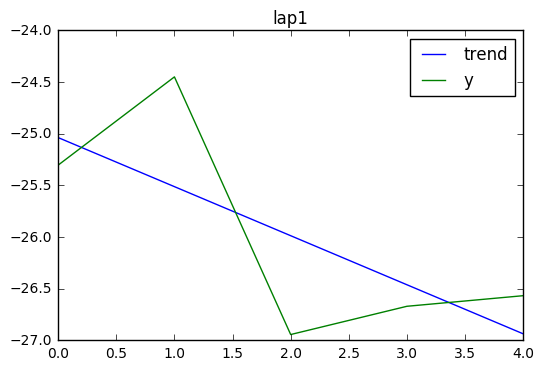

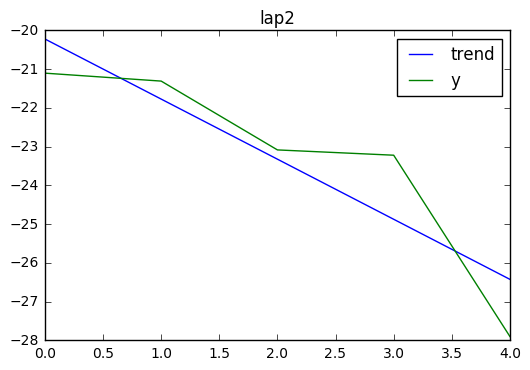

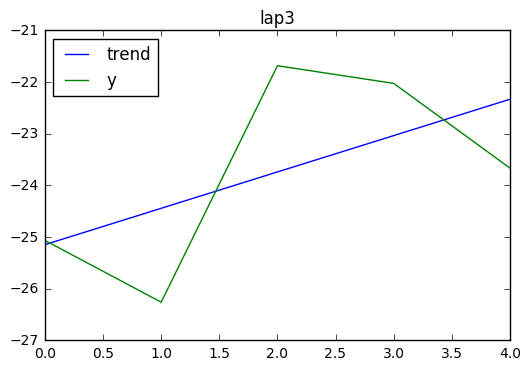

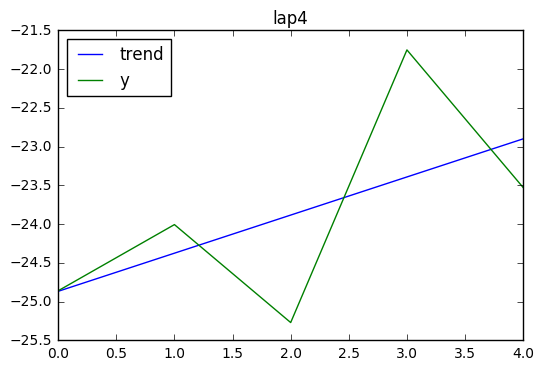

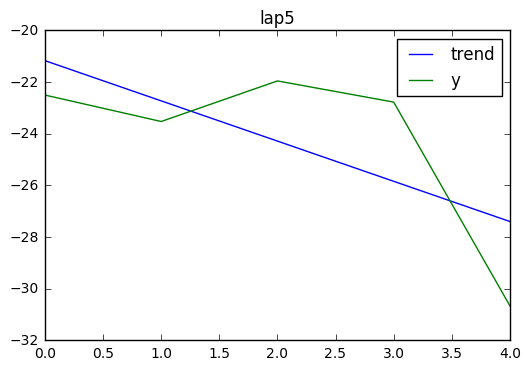

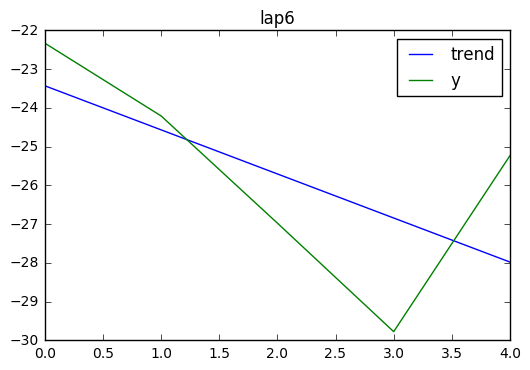

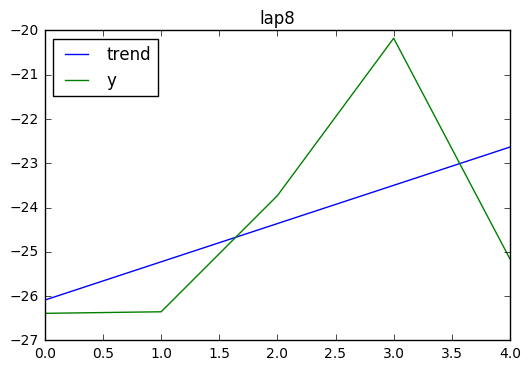

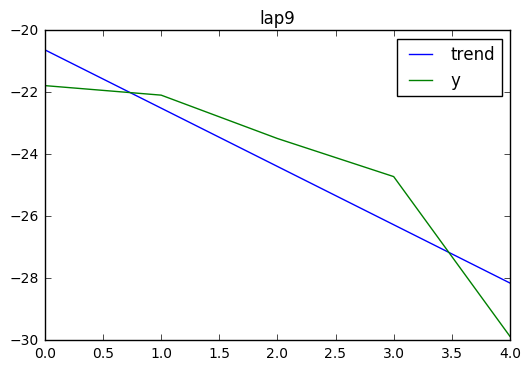

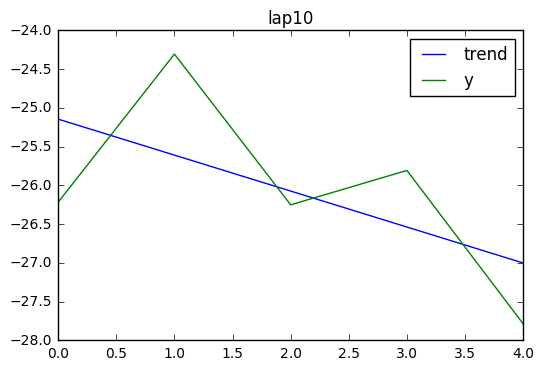

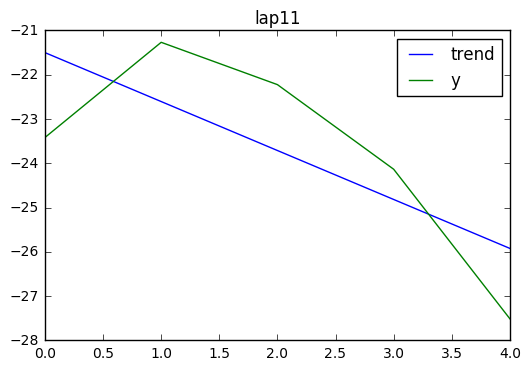

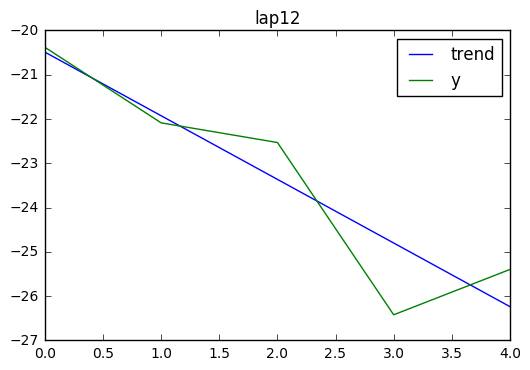

In [68]:

#plot the lines, and then all together
#really i've just been looking through these, i need to find a way of comparing the trend lines so we
#can get a range of error over the laps, also possibly make a trend line for the 12 trend lines


data = pd.DataFrame(index = x, data = {'1': trend1, '2': trend2, '3':trend3, '4':trend4, '5': trend5,
                                      '6':trend6, '8': trend8, '9': trend9, '10': trend10, '11':trend11,
                                      '12': trend12, '3': trend3, '6': trend6})
data.plot.line(legend=False, title = 'all')

data1 = pd.DataFrame(index = x, data = {'y': lap_1_mean, 'trend': trend1})
data1.plot.line(title = 'lap1')

data1 = pd.DataFrame(index = x, data = {'y': lap_2_mean, 'trend': trend2})
data1.plot.line(title = 'lap2')

data1 = pd.DataFrame(index = x, data = {'y': lap_3_mean, 'trend': trend3})
data1.plot.line(title = 'lap3')

data1 = pd.DataFrame(index = x, data = {'y': lap_4_mean, 'trend': trend4})
data1.plot.line(title = 'lap4')

data1 = pd.DataFrame(index = x, data = {'y': lap_5_mean, 'trend': trend5})
data1.plot.line(title = 'lap5')

data1 = pd.DataFrame(index = x, data = {'y': lap_6_mean, 'trend': trend6})
data1.plot.line(title = 'lap6')

#data1 = pd.DataFrame(index = x, data = {'y': lap_7_mean, 'trend': trend7})
#data1.plot.line(title = 'lap7')

data1 = pd.DataFrame(index = x, data = {'y': lap_8_mean, 'trend': trend8})
data1.plot.line(title = 'lap8')

data1 = pd.DataFrame(index = x, data = {'y': lap_9_mean, 'trend': trend9})
data1.plot.line(title = 'lap9')

data1 = pd.DataFrame(index = x, data = {'y': lap_10_mean, 'trend': trend10})
data1.plot.line(title = 'lap10')

data1 = pd.DataFrame(index = x, data = {'y': lap_11_mean, 'trend': trend11})
data1.plot.line(title = 'lap11')

data1 = pd.DataFrame(index = x, data = {'y': lap_12_mean, 'trend': trend12})
data1.plot.line(title = 'lap12')

In [69]:
#beginning of averaging multiple ports together, so like, right side, left side, middle
#windows going across the board, different variations of that and then do the same as above

#need comfirmation from danny as to how exactly the ports were situated

test = pressure_df.loc[pressure_df['event_label'] == event]
test = test.loc[pressure_df['lap_#'] == 'lap_1']
test = test[['port_6', 'port_7', 'port_8', 'port_9', 'port_10', 'port_11', 'port_12']].reset_index(drop = True)
test

#test = test[port, 'port_7']
#test = test.reset_index(drop= True)

,port_6,port_7,port_8,port_9,port_10,port_11,port_12
0,-26.464792,-27.324189,-27.560509,-25.09996,-21.295051,-23.501245,-24.445379
1,-26.122792,-27.324189,-27.391509,-24.56376,-22.193451,-24.356245,-24.625179
2,-24.415092,-26.206289,-27.051509,-24.92126,-21.295051,-23.672245,-23.905979
3,-25.098192,-26.578889,-26.542509,-25.63626,-22.193451,-24.698245,-24.984679
4,-24.415092,-25.461089,-25.693509,-23.31256,-20.576351,-22.988245,-23.007079
5,-21.341292,-22.293989,-22.807109,-21.52514,-18.599951,-21.107245,-20.669369
6,-22.536692,-23.039189,-23.486509,-22.06137,-19.138951,-20.936245,-22.287979
7,-26.464792,-27.137889,-27.730509,-25.99366,-22.013751,-24.869245,-25.344279
8,-27.147792,-28.069189,-27.900509,-25.99366,-22.373151,-24.869245,-25.524079
9,-24.756692,-25.833689,-26.542509,-24.92126,-21.834151,-24.014245,-24.265579
